In [3]:
# install cartopy package from "https://scitools.org.uk/cartopy/docs/latest/installing.html"
# To get a good idea of the visualization library, you can go through tutorials in... 
# ..."https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html"
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.integrate import solve_ivp
from scipy.integrate import odeint


The first thing to do for geospatial data is to install python packages that are capable of plotting such data. This can be done using cartopy package for visualization

In the following line, extract the rainfall, forest, and spatial coordinates for different regions on the world map.


In [4]:
mat_file = scipy.io.loadmat('project2data.mat')
print(sorted(mat_file.keys()))

['__globals__', '__header__', '__version__', 'forest_data_2014', 'lats', 'lons', 'rainfall_data_avg']


In [5]:
rainfall_data_avg = mat_file['rainfall_data_avg']
forest_data_2014 = mat_file['forest_data_2014']
lats = mat_file['lats'].squeeze()
lons = mat_file['lons'].squeeze()

Run the next line to print and see what is the shape of each extracted array

In [6]:
print('rainfall matrix shape:', rainfall_data_avg.shape, '\n')
print('forest cover matrix shape:', forest_data_2014.shape, '\n')
print('latitude information array shape:', lats.shape, '\n')
print('longitude information array shape:', lons.shape)

rainfall matrix shape: (102, 530) 

forest cover matrix shape: (102, 530) 

latitude information array shape: (102,) 

longitude information array shape: (530,)


The cell below shows how to plot a matrix data on the world map. Each row of the matrix correspond to specific latitude number (in 'lats') and each column of the matrix correspond to specific longitude (in 'lons').

As an example we will plot the rainfall_data below

c:\Users\dinht\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


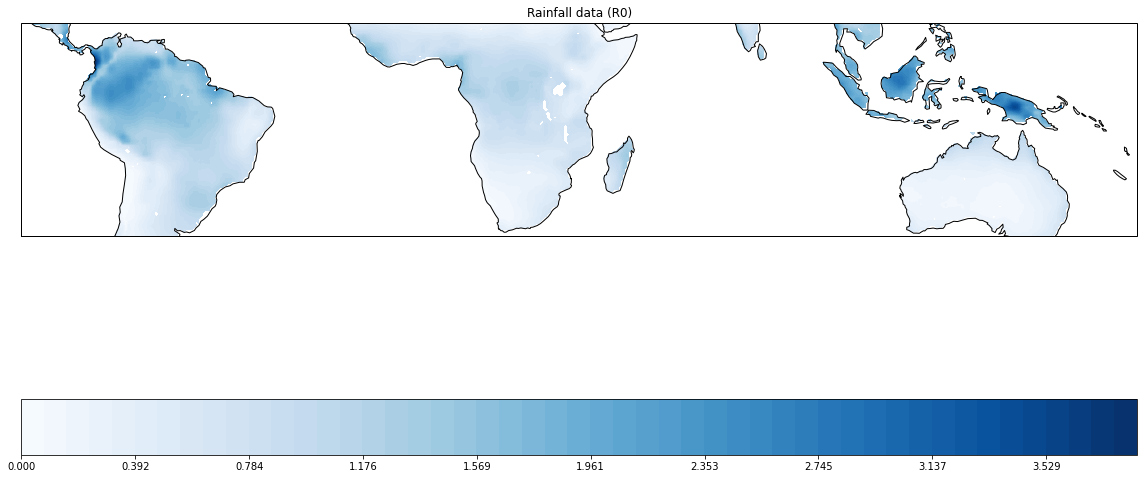

In [7]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())


levels = np.linspace(0,np.nanmax(rainfall_data_avg))
CS=plt.contourf(lons, lats,  rainfall_data_avg , cmap='Blues', levels=levels)

ax.coastlines()
cbar = fig.colorbar(CS,orientation='horizontal')
plt.title("Rainfall data (R0)")
plt.savefig("rainfall.png")
plt.show()


Below you should use the same method, and plot the forest_data_2014 across the world map 

In [8]:
## Write Code here to plot the forest_data by limiting the color bar/heatmap levels from (minimum - maximum) = (0 - 80)%
def plot(lons,lats,data,title,filename=None,use_colorbar=True):
    fig = plt.figure(figsize=(20, 20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())


    levels = np.linspace(0,80,100)
    CS=plt.contourf(lons, lats,  data , cmap='Greens', levels=levels)

    ax.coastlines()
    if use_colorbar:
        cbar= fig.colorbar(CS,orientation='horizontal')
    if filename!=None:
        plt.savefig(filename)
    plt.title(title)
    
    plt.show()

In [9]:
## PLEASE FILL YOUR CODE IN AS DESCRIBED BELOW
##DEFINE THE PARAMETERS OF THE DIFFERENTIAL EQUATION IN THE DICTIONARY CALLED "params"
params = dict({'R0':2.0,'r_m':0.3,'h_R':0.5,'m_n':0.15,'h_n':10,'m_f':0.11,'h_f':60,'p':7,'k':90,'b':2,'r_R':1})

def TreeRate(t, treecov, params):
    ## WRITE YOUR CODE HERE TO COMPUTE THE RATE OF CHANGE IN TREECOVER 
    ## GIVEN time 't', current treecover 'treecov' and the parameters of the differential equation.
    R0 = params['R0']
    r_m,h_R  = params['r_m'],params['h_R']
    m_n, h_n = params['m_n'],params['h_n']
    m_f, h_f = params['m_f'],params['h_f']
    p, k     = params['p'],params['k']

    def f(y,time):
        T,R = y
        dydt = [T*( (r_m * (R/(h_R + R))* (1 - (T/k)))
                     +(-m_n*(h_n/(T + h_n)))   
                     +(-m_f * (pow(h_f, p) / (pow(T, p) + pow(h_f, p))))), 
                0]

        return dydt
    
    T   = np.linspace(0,t,500)
    Y = odeint(f, [treecov,R0], T)
    
    return Y[-1,0]
    #return rate

def get_default_params():
    #Default values from Table 1
    R0  =  2.0  #[mm/day]   default amount of rainfall 
    r_m =  0.3  #[1/yr]     maximal rate of tree cover expansion rate
    h_R =  0.5  #[mm/day]   rainfall value where r is reduced by half
    m_n =  0.15 #[1/yr]     maximal loss rate due to nursing effect
    h_n = 10    #[%]        tree cover below which rate of loss increases steeply (nursing effect)
    m_f =  0.11 #[1/yr]     maximal rate of loss due to fire mortality
    h_f = 60    #[%]        tree cover below which rate of loss increases steeply (fire mortality)
    p   =  7    #[]         Hill function exponent
    k   = 90    #[%]        Maximal carrying capacity
    b   =  2
    r_R =  1
    return R0, r_m, h_R, m_n, h_n, m_f, h_f, p, k,b,r_R
    


In [10]:
# you should compute the treecover in the year 2044 by simulating the treecover for 30 years from given 2014 data
count = 0
hyscurve = []
num_years = 30

# initializing the forest cover variable in the year 2044
forest_data_2044 = np.zeros((rainfall_data_avg.shape[0], rainfall_data_avg.shape[1]))

for rows in range(rainfall_data_avg.shape[0]):
    for cols in range(rainfall_data_avg.shape[1]):
        if np.isnan(forest_data_2014[rows, cols]) == 0 and np.isnan(rainfall_data_avg[rows, cols]) == 0:
            ## PLEASE FILL YOUR CODE IN AS DESCRIBED BELOW
            # WRITE YOUR CODE HERE TO COMPUTE THE FINAL TREECOVER AFTER 30 YEARS. i.e., forest_data_2044
            # PUT YOUR RESULT IN THE MATRIX "forest_data_2044[rows, cols]"
            params['R0'] = rainfall_data_avg[rows, cols]
            R0 = rainfall_data_avg[rows, cols]
            T0 = forest_data_2014[rows, cols]
            forest_data_2044[rows, cols]  = TreeRate(num_years, T0, params)
            # forest_data_human[rows, cols] = simple_model(num_years=num_years,R0=R0,T0=T0,params=params)         
            
        else:
            forest_data_2044[rows, cols] = np.nan  

Once your obtian the final tree cover values in the year 2044, plot the obtained values on the world map based on the latitude and longitude data, using cartopy library, and compare how it changes in the southamerican and african continents from 2014 values.

The Code below should plot the treecover in the year 2014

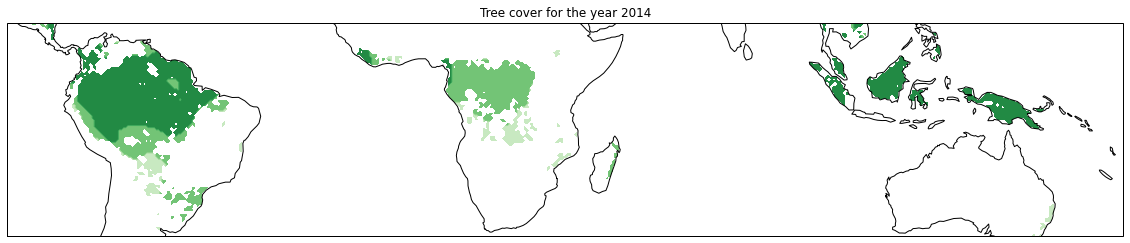

In [11]:
## Write your code here to plot the forest_data on the worldmap in 2014 followed by the simulated forest cover at year-2044 below it.
## Ideally you should see changes in forest cover between 2014 and 2044 if your simulation did not have any problems.
plot(lons=lons,lats=lats,data=forest_data_2014,title="Tree cover for the year 2014",filename='2014.png',use_colorbar=False)






The Code below plots the treecover after 30 years, i.e., in the year 2044

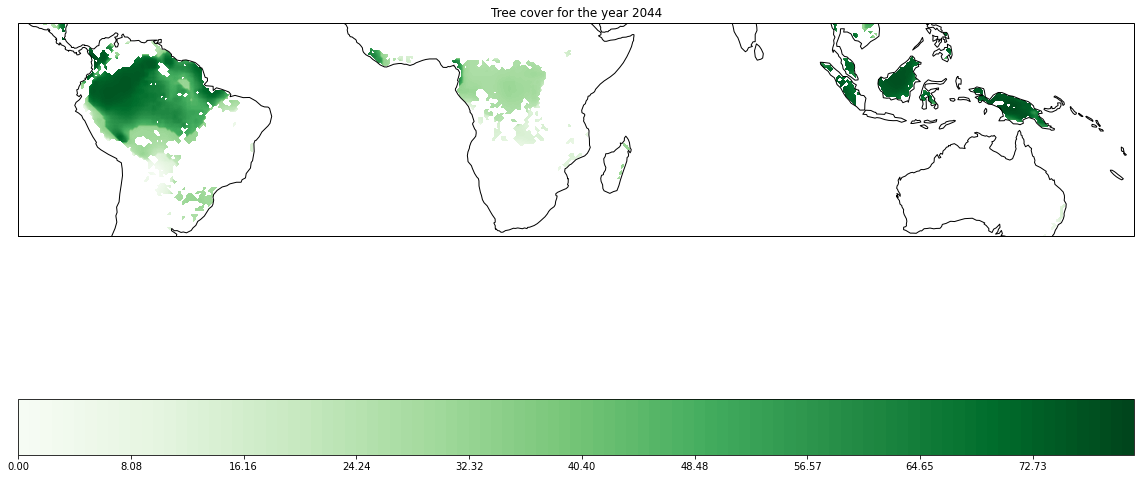

In [12]:

plot(lons=lons,lats=lats,data=forest_data_2044,title="Tree cover for the year 2044",filename='2044.png')
